# Rs 7 0 1_ Bayesian Calculator
Bayesian calculator: basic exmple




**Author:** Gregory Schott  
<i><small>This notebook tutorial was automatically generated with <a href= "https://github.com/root-project/root/blob/master/documentation/doxygen/converttonotebook.py">ROOTBOOK-izer</a> from the macro found in the ROOT repository  on Thursday, August 29, 2019 at 03:23 AM.</small></i>

In [1]:
%%cpp -d
#include "RooRealVar.h"
#include "RooWorkspace.h"
#include "RooDataSet.h"
#include "RooPlot.h"
#include "RooMsgService.h"

#include "RooStats/BayesianCalculator.h"
#include "RooStats/SimpleInterval.h"
#include "TCanvas.h"

In [2]:
%%cpp -d
// This is a workaround to make sure the namespace is used inside functions
using namespace RooFit;
using namespace RooStats;

 Arguments are defined. 

In [3]:
bool useBkg = true;
double confLevel = 0.90;

In [4]:
RooWorkspace *w = new RooWorkspace("w", true);
w->factory("SUM::pdf(s[0.001,15]*Uniform(x[0,1]),b[1,0,2]*Uniform(x))");
w->factory("Gaussian::prior_b(b,1,1)");
w->factory("PROD::model(pdf,prior_b)");
RooAbsPdf *model = w->pdf("model"); // pdf*priorNuisance
RooArgSet nuisanceParameters(*(w->var("b")));

RooAbsRealLValue *POI = w->var("s");
RooAbsPdf *priorPOI = (RooAbsPdf *)w->factory("Uniform::priorPOI(s)");
RooAbsPdf *priorPOI2 = (RooAbsPdf *)w->factory("GenericPdf::priorPOI2('1/sqrt(@0)',s)");

w->factory("n[3]"); // observed number of events


RooFit v3.60 -- Developed by Wouter Verkerke and David Kirkby 
                Copyright (C) 2000-2013 NIKHEF, University of California & Stanford University
                All rights reserved, please read http://roofit.sourceforge.net/license.txt

[#1] INFO:ObjectHandling -- RooWorkspace::exportToCint(w) INFO: references to all objects in this workspace will be created in CINT in 'namespace w'


input_line_38:1:11: error: redefinition of 'w' as different kind of symbol
namespace w { RooRealVar& s = *(RooRealVar *)0x7fd37c16b720 ; }
          ^
input_line_33:2:16: note: previous definition is here
 RooWorkspace *w = new RooWorkspace("w", true);
               ^
input_line_39:1:11: error: redefinition of 'w' as different kind of symbol
namespace w { RooRealVar& x = *(RooRealVar *)0x7fd37c108b50 ; }
          ^
input_line_33:2:16: note: previous definition is here
 RooWorkspace *w = new RooWorkspace("w", true);
               ^
input_line_40:1:11: error: redefinition of 'w' as different kind of symbol
namespace w { RooUniform& pdf_1 = *(RooUniform *)0x7fd37c318b60 ; }
          ^
input_line_33:2:16: note: previous definition is here
 RooWorkspace *w = new RooWorkspace("w", true);
               ^
input_line_41:1:11: error: redefinition of 'w' as different kind of symbol
namespace w { RooRealVar& b = *(RooRealVar *)0x7fd37c16af70 ; }
          ^
input_line_33:2:16: note: previous 

Create a data set with n observed events

In [5]:
RooDataSet data("data", "", RooArgSet(*(w->var("x")), *(w->var("n"))), "n");
data.add(RooArgSet(*(w->var("x"))), w->var("n")->getVal());

To suppress messages when pdf goes to zero

In [6]:
RooMsgService::instance().setGlobalKillBelow(RooFit::FATAL);

RooArgSet *nuisPar = 0;
if (useBkg)
   nuisPar = &nuisanceParameters;

If (!usebkg) ((roorealvar *)w->var("b"))->setval(0);

In [7]:
double size = 1. - confLevel;
std::cout << "\nBayesian Result using a Flat prior " << std::endl;
BayesianCalculator bcalc(data, *model, RooArgSet(*POI), *priorPOI, nuisPar);
bcalc.SetTestSize(size);
SimpleInterval *interval = bcalc.GetInterval();
double cl = bcalc.ConfidenceLevel();
std::cout << cl << "% CL central interval: [ " << interval->LowerLimit() << " - " << interval->UpperLimit()
          << " ] or " << cl + (1. - cl) / 2 << "% CL limits\n";
RooPlot *plot = bcalc.GetPosteriorPlot();
TCanvas *c1 = new TCanvas("c1", "Bayesian Calculator Result");
c1->Divide(1, 2);
c1->cd(1);
plot->Draw();
c1->Update();

std::cout << "\nBayesian Result using a 1/sqrt(s) prior  " << std::endl;
BayesianCalculator bcalc2(data, *model, RooArgSet(*POI), *priorPOI2, nuisPar);
bcalc2.SetTestSize(size);
SimpleInterval *interval2 = bcalc2.GetInterval();
cl = bcalc2.ConfidenceLevel();
std::cout << cl << "% CL central interval: [ " << interval2->LowerLimit() << " - " << interval2->UpperLimit()
          << " ] or " << cl + (1. - cl) / 2 << "% CL limits\n";

RooPlot *plot2 = bcalc2.GetPosteriorPlot();
c1->cd(2);
plot2->Draw();
gPad->SetLogy();
c1->Update();


Bayesian Result using a Flat prior 
0.9% CL central interval: [ 0.50606 - 6.89326 ] or 0.95% CL limits

Bayesian Result using a 1/sqrt(s) prior  
0.9% CL central interval: [ 0.0746294 - 5.85425 ] or 0.95% CL limits


Observe one event while expecting one background event -> the 95% cl upper limit on s is 4.10
 observe one event while expecting zero background event -> the 95% CL upper limit on s is 4.74

Draw all canvases 

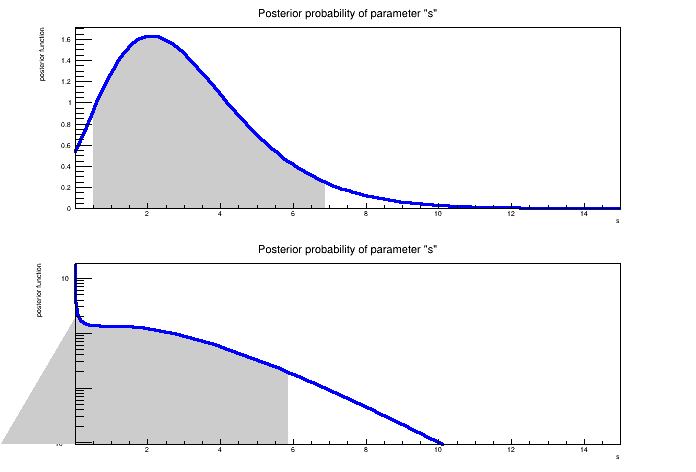

In [8]:
gROOT->GetListOfCanvases()->Draw()